---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 2.0: 1D Non-Linear Convection

---

In this step we introduce **non-linearity** by allowing the wave speed to be $u$, not constant $c$. This radically changes the behaviour of the wave. Following the example from Step 1, if $u$ is higher in one region (e.g $u=2$) than another (e.g $u=1$) the faster region can catch up the slower one, deforming the wave.

The non-linear convection equation

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Following the Finite Differences method, the discretized equation becomes

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

In [55]:
grid_points = 151                              # Number of grid points
grid_length = 5                                # Lenght of the grid
dx = grid_length / (grid_points - 1)           # Distance between adjacent grid points
time_steps = 301                               # Number of time steps
dt = 0.0083                                    # Size of time steps

u = np.ones(grid_points)
u[int(0.5 / dx) : int((1 / dx) + 1)] = 2
u_n = u_n = np.ones(grid_points)

x = np.linspace(0, grid_length, grid_points)

(0.0, 5.0)

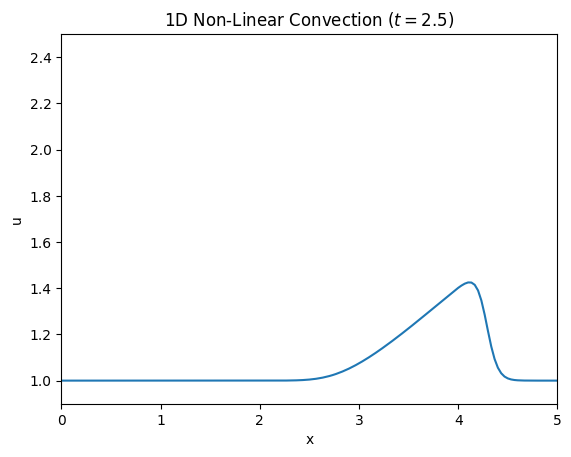

In [56]:
for n in range(time_steps):
    u_n = u.copy()
    for i in range(1, grid_points):
        u[i] = u_n[i] - u_n[i] * (dt / dx) * (u_n[i] - u_n[i-1])

fig, ax1 = plt.subplots()
ax1.plot(x, u_n)
ax1.set_title(r'1D Non-Linear Convection ($t=2.5$)')
ax1.set_xlabel("x")
ax1.set_ylabel("u")
ax1.set_ylim(0.9, 2.5)
ax1.set_xlim(0, grid_length)

A first sight comparison between this output and the one in Step 1 is that the curve seems to have convected a lot faster this time, let's unveil what happens with the animation

In [57]:
plt.ioff()

fig, ax2 = plt.subplots()
fig.set_size_inches(6, 5)
ax2.set_title(r'1D Non-Linear Convection (from $t=0$ to $t=2.5$)', fontsize = 12)
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("u", fontsize=12)
ax2.set_ylim(0.9, 2.5)
ax2.set_xlim(0, grid_length)
ax2.grid(True, linestyle='--', alpha=0.3)

line, = ax2.plot([], [], color='#008080', lw=2)

u = np.ones(grid_points)
u[int(0.5 / dx) : int((1 / dx) + 1)] = 2

def init():
    line.set_data([], [])
    return line,

def update_anim(j):
    u_n = u.copy()
    for i in range(1, grid_points):
        u[i] = u_n[i] - u_n[i] * (dt / dx) * (u_n[i] - u_n[i-1])
    line.set_data(x, u)
    return line,

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50,
                blit = True
)

anim.save('1D_non_linear_convection.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()

print(dt/dx)

0.249


It can be seen from the animation that the waves catches up the slower region and the wave deforms, it gets steeper and forms a wave front.

Notice that when `grid_points = 151` the Python shell returns two errors:

* `RuntimeWarning: overflow encountered in scalar multiply`
* `RuntimeWarning: overflow encountered in scalar addition`

This suggests that the numerical solution is blowing up, leading to values too large for Python’s NumPy to handle (typically exceeding the floating-point limit, like $10^{308}$ for `float64`).

These overflow warnings occur when the finite difference scheme produces unreasonably large numbers, often due to numerical instability, more on that in **Step 2.1**